width:  500
height:  375
Enter the values and make sure they are in bounds: 
Enter x-coordinate of top left: 25
Enter y-coordinate of top left: 50
Enter x-coordinate of bottom right: 450
Enter y-coordinate of bottom right: 320
Foreground mask


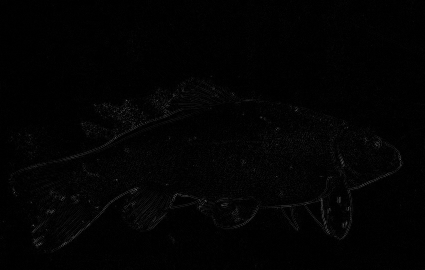


Thresholded mask


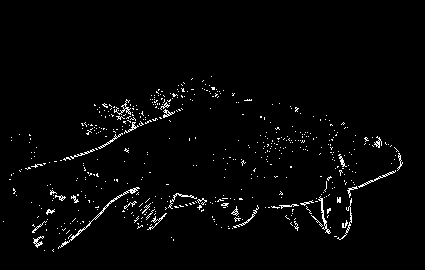


Cleaned mask


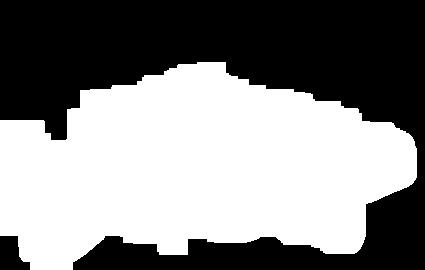


Final output


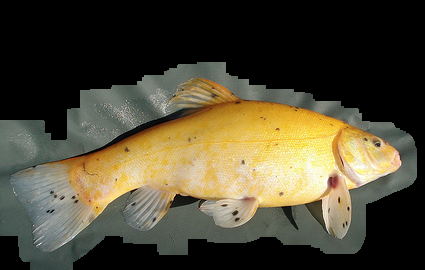

In [127]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Loading the image
image0 = cv2.imread('fish.JPEG')

h0,w0,c = image0.shape

print('width: ',w0)
print('height: ',h0)

print('Enter the values and make sure they are in bounds: ')

x1 = int(input('Enter x-coordinate of top left: '))
y1 = int(input('Enter y-coordinate of top left: '))
x2 = int(input('Enter x-coordinate of bottom right: '))
y2 = int(input('Enter y-coordinate of bottom right: '))
# changing image according to region of interest
roi = image0[y1:y2,x1:x2]

# Converting the image to grayscale (necessary for background subtraction)
gray_image = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# created a background model using gaussian blur (can use other types also but gaussian blur gives better results)
background_model = cv2.GaussianBlur(gray_image, (3,3), 0)

# Extracting foreground model by taking difference between original gray-scale image and blurred image (this helps us to extract edges)
foreground_mask = cv2.absdiff(gray_image, background_model)
print('Foreground mask')
cv2_imshow(foreground_mask)
print()

# Applying threshold to create a binary mask
_, thresholded_mask = cv2.threshold(foreground_mask, 15, 255, cv2.THRESH_BINARY)
print('Thresholded mask')
cv2_imshow(thresholded_mask)
print()

# Apply morphological operations to clean up the mask to get a better output
kernel = np.ones((15, 15), np.uint8)

# Here dilation is done first because if we directly because we the part of foreground will have almost 0 intensity and very less white pixels
# So, even having 1 white pixel inside the edges will prove that it is part of foreground and we try to increase that region using dilate
dilated_mask = cv2.dilate(thresholded_mask,kernel,iterations=2)
# Now we do morphology to clean up isolated white pixels (erosion) and then again dilate if anything significant remains.
# Hence we used morphology here
cleaned_mask = cv2.morphologyEx(dilated_mask, cv2.MORPH_CLOSE, kernel)
print('Cleaned mask')
cv2_imshow(cleaned_mask)
print()

# Perform bitwise-and with roi to get the foreground
result_image = cv2.bitwise_and(roi, roi, mask=cleaned_mask)
print('Final output')
cv2_imshow(result_image)

# In the image we can that there is a region of background getting included in this is because we are dilating around the edges and hence some
# of the background gets included in it

cv2.waitKey(0)
cv2.destroyAllWindows()


width:  500
height:  375
Enter the values and make sure they are in bounds: 
Enter x-coordinate of top left: 50
Enter y-coordinate of top left: 50
Enter x-coordinate of bottom right: 450
Enter y-coordinate of bottom right: 350
Foreground mask


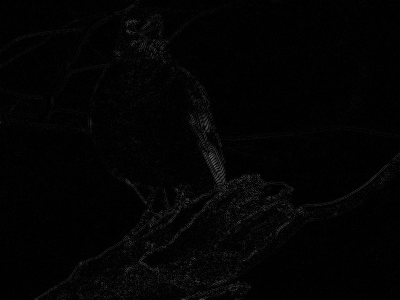


Thresholded mask


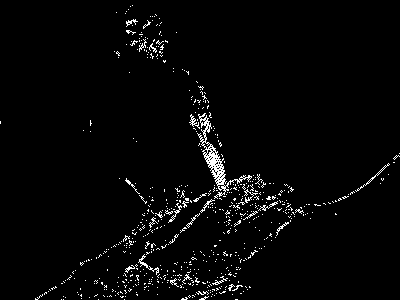


Cleaned mask


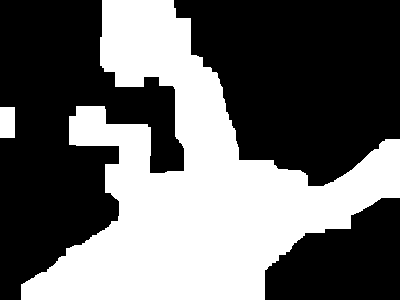


Final output


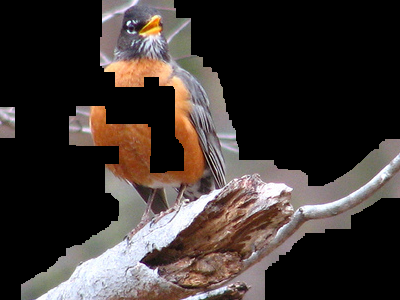

In [128]:
# Loading the image
image1 = cv2.imread('robin_bird.JPEG')

h1,w1,c = image1.shape

print('width: ',w1)
print('height: ',h1)

print('Enter the values and make sure they are in bounds: ')

x1 = int(input('Enter x-coordinate of top left: '))
y1 = int(input('Enter y-coordinate of top left: '))
x2 = int(input('Enter x-coordinate of bottom right: '))
y2 = int(input('Enter y-coordinate of bottom right: '))

# changing image according to region of interest
roi1 = image1[y1:y2,x1:x2]

# Convert the image to grayscale (necessary for background subtraction)
gray_image = cv2.cvtColor(roi1, cv2.COLOR_BGR2GRAY)

# created a background model using gaussian blur (can use other types also but gaussian blur gives better results)
background_model = cv2.GaussianBlur(gray_image, (3,3), 0)

# Extracting foreground model by taking difference between original gray-scale image and blurred image (this helps us to extract edges)
print('Foreground mask')
foreground_mask = cv2.absdiff(gray_image, background_model)
cv2_imshow(foreground_mask)
print()

# Applying threshold to create a binary mask
_, thresholded_mask = cv2.threshold(foreground_mask, 20, 255, cv2.THRESH_BINARY)
print('Thresholded mask')
cv2_imshow(thresholded_mask)
print()

# Here dilation is done first because if we directly because we the part of foreground will have almost 0 intensity and very less white pixels
# So, even having 1 white pixel inside the edges will prove that it is part of foreground and we try to increase that region using dilate
dilated_mask = cv2.dilate(thresholded_mask,kernel,iterations=2)
# Now we do morphology to clean up isolated white pixels (erosion) and then again dilate if anything significant remains.
# Hence we used morphology here
cleaned_mask = cv2.morphologyEx(dilated_mask, cv2.MORPH_CLOSE, kernel)
print('Cleaned mask')
cv2_imshow(cleaned_mask)
print()

# Perform bitwise-and with roi to get the foreground
result_image = cv2.bitwise_and(roi1, roi1, mask=cleaned_mask)
print('Final output')
cv2_imshow(result_image)
# In the image we can that there is a region of background getting included in this is because we are dilating around the edges and hence some
# of the background gets included in it

cv2.waitKey(0)
cv2.destroyAllWindows()

width:  500
height:  375
Enter the values and make sure they are in bounds: 
Enter x-coordinate of top left: 50
Enter y-coordinate of top left: 50
Enter the with of region of interest: 400
Enter the height of region of interest: 270
Input image


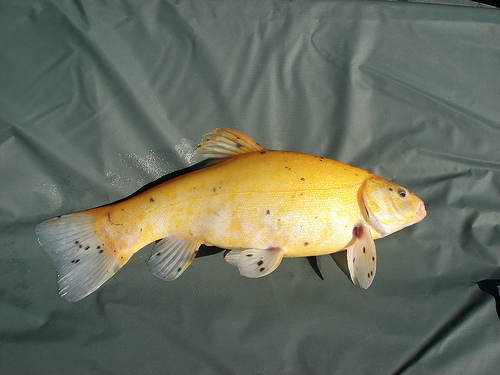


Output image


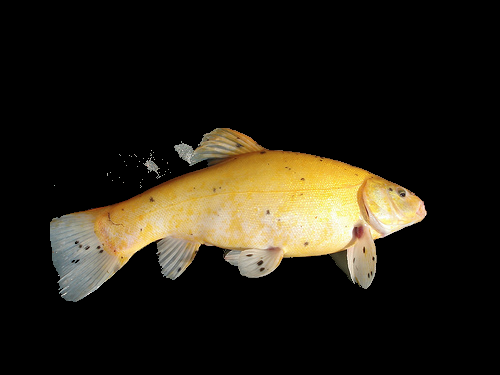

In [129]:
#grab cut
# In this part I have used grabcut algoritm to get better results around the edges of the fish

# Loading the image
image2 = cv2.imread('fish.JPEG')  # Replace 'input_image.jpg' with your image file path

# Created a mask to initialize the background and foreground regions
mask = np.zeros(image2.shape[:2], np.uint8)

# Define a rectangle indicating region of interest rect(x,y,w,h)
h2,w2,c = image2.shape

print('width: ',w2)
print('height: ',h2)

print('Enter the values and make sure they are in bounds: ')

x1 = int(input('Enter x-coordinate of top left: '))
y1 = int(input('Enter y-coordinate of top left: '))
x2 = int(input('Enter the with of region of interest: '))
y2 = int(input('Enter the height of region of interest: '))
rect = (x1, y1, x2, y2)

# setting the rectangle region as probable foreground which is indicated with 3
mask[rect[1]:rect[1] + rect[3], rect[0]:rect[0] + rect[2]] = 1

# Apply GrabCut algorithm to segment the object(s)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(image2, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Creating a new mask to classify probable foreground and foreground as 1 and probable background and background as 0
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Perform bitwise and with image to get the foreground
result_image = cv2.bitwise_and(image2, image2, mask=mask2)

# Displaying the original image and the foreground object(s)
print('Input image')
cv2_imshow(image2)
print()
print('Output image')
cv2_imshow(result_image)
# Here we get almost null background and it finely detects the objects and apart from region of interest we made everything 0(i.e background)
# and displaying total image

cv2.waitKey(0)
cv2.destroyAllWindows()


width:  500
height:  375
Enter the values and make sure they are in bounds: 
Enter x-coordinate of top left: 50
Enter y-coordinate of top left: 50
Enter the with of region of interest: 400
Enter the height of region of interest: 300
Input image


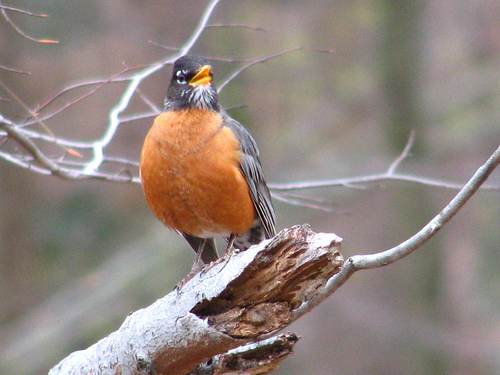


Output image


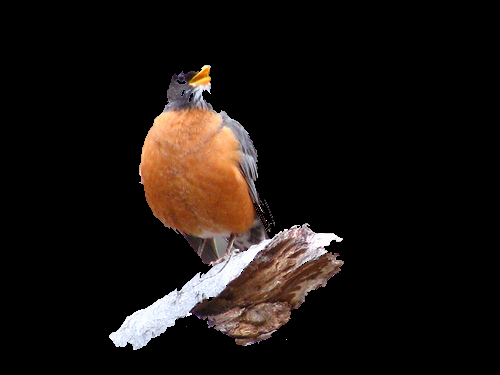

In [130]:
#grab cut
# In this part I have used grabcut algoritm to get better results around the edges of the foreground

# Loading the image
image3 = cv2.imread('robin_bird.JPEG')  # Replace 'input_image.jpg' with your image file path

# Created a mask to initialize the background and foreground regions
mask = np.zeros(image3.shape[:2], np.uint8)

# Define a rectangle indicating region of interest rect(x,y,w,h)
h3,w3,c = image2.shape

print('width: ',w3)
print('height: ',h3)

print('Enter the values and make sure they are in bounds: ')

x1 = int(input('Enter x-coordinate of top left: '))
y1 = int(input('Enter y-coordinate of top left: '))
x2 = int(input('Enter the with of region of interest: '))
y2 = int(input('Enter the height of region of interest: '))
rect = (x1, y1, x2, y2)

# setting the rectangle region as probable foreground which is indicated with 3
mask[rect[1]:rect[1] + rect[3], rect[0]:rect[0] + rect[2]] = 1

# Apply GrabCut algorithm to segment the object(s)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(image3, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Creating a new mask to classify probable foreground and foreground as 1 and probable background and background as 0
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Perform bitwise and with image to get the foreground
result_image = cv2.bitwise_and(image3, image3, mask=mask2)

# Displaying the original image and the foreground object(s)
print('Input image')
cv2_imshow(image3)
print()
print('Output image')
cv2_imshow(result_image)
# Here we get almost null background and it finely detects the objects and apart from region of interest we made everything 0(i.e background)
# and displaying total image

cv2.waitKey(0)
cv2.destroyAllWindows()
